In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
%cd ../stats_CSV

c:\Users\ixaka\Documents\Visualization\cube_x3d\stats_CSV


In [3]:
one = pd.read_csv('stats_one.csv')
ten = pd.read_csv('stats_ten.csv')
o2c7 = pd.read_csv('stats_one_2c7.csv')
o2c4 = pd.read_csv('stats_one_2c4.csv')
m2c5_6 = pd.read_csv('stats_mul_2c5-6.csv')
m2_5 = pd.read_csv('stats_mul_2-5.csv')
# m22c4 = pd.read_csv('stats_2-2c2-2c4.csv') # No usar, solo es para RAM
ten_fin = pd.read_csv('stats_ten_final.csv')
mul_fin = pd.read_csv('stats_mul_2c5-7_final.csv')

In [4]:
names = np.hstack([one['Name'], ten['Name'], o2c7['Name'], o2c4['Name'], m2c5_6['Name'],
                     m2_5['Name'], ten_fin['Name'], mul_fin['Name']])
fits = np.hstack([one['FITS'], ten['FITS'], o2c7['FITS'], o2c4['FITS'], m2c5_6['FITS'], 
                  m2_5['FITS'], ten_fin['FITS'], mul_fin['FITS']])
hicont = np.hstack([one['HIcont'], ten['HIcont'], o2c7['HIcont'], o2c4['HIcont'], m2c5_6['HIcont'], 
                    m2_5['HIcont'], ten_fin['HIcont'], mul_fin['HIcont']])
hicont_p = np.hstack([one['HIcont_p'], ten['HIcont_p'], ten_fin['HIcont_p']])
y_highno = np.hstack([one['High/No'], ten['High/No'], o2c7['High/No'], o2c4['High/No'],
                      m2c5_6['High/No'], m2_5['High/No'], ten_fin['High/No'], mul_fin['High/No']])
y_highyes = np.hstack([ten_fin['High/Yes'], mul_fin['High/Yes']])
y_tri2 = np.hstack([one['Tri2'], ten['Tri2'], o2c7['Tri2'], o2c4['Tri2'], m2c5_6['Tri2'], 
                    m2_5['Tri2'],  ten_fin['Tri2'], mul_fin['Tri2']])
y_tri3 = np.hstack([one['Tri3'], ten['Tri3'], o2c7['Tri3'], o2c4['Tri3'], m2c5_6['Tri3'], 
                    m2_5['Tri3'], ten_fin['Tri3'], mul_fin['Tri3']])
y_tri5 = np.hstack([one['Tri5'], ten['Tri5'], o2c7['Tri5'], o2c4['Tri5'], m2c5_6['Tri5'], 
                    m2_5['Tri5'],  ten_fin['Tri5'], mul_fin['Tri5']])



In [5]:
print(pearsonr(fits, y_highno))
print(pearsonr(fits, y_tri2))
print(pearsonr(fits, y_tri3))
print(pearsonr(fits, y_tri5))

print(pearsonr(hicont, y_highno))
print(pearsonr(hicont, y_tri2))
print(pearsonr(hicont, y_tri3))
print(pearsonr(hicont, y_tri5))

PearsonRResult(statistic=0.6447087228534052, pvalue=4.62648389247206e-30)
PearsonRResult(statistic=0.3704153612723107, pvalue=2.3714154873408034e-09)
PearsonRResult(statistic=0.36261776358195275, pvalue=5.379388688288164e-09)
PearsonRResult(statistic=0.35837273442297307, pvalue=8.325700349465229e-09)
PearsonRResult(statistic=0.799226982105079, pvalue=1.9891169885777886e-55)
PearsonRResult(statistic=0.5514427179639164, pvalue=8.186401334463705e-21)
PearsonRResult(statistic=0.5398177915771034, pvalue=7.43718179783907e-20)
PearsonRResult(statistic=0.5261808894161544, pvalue=8.8995033320002e-19)


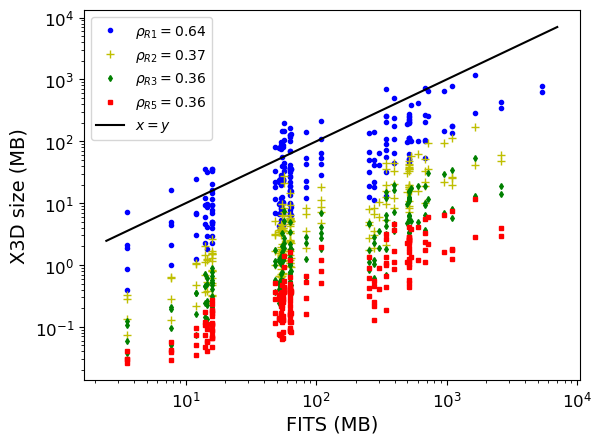

In [6]:
# plt.axline((7,7), (5e3,5e3), color='k', label=r'$x=y$')
plt.plot(fits, y_highno, 'b.', label=r'$\rho_{R1} = %s$'%np.round(pearsonr(fits, y_highno).statistic,2))
plt.plot(fits, y_tri2, 'y+', label=r'$\rho_{R2} = %s$'%np.round(pearsonr(fits, y_tri2).statistic,2))
plt.plot(fits, y_tri3, 'gd', markersize=3, label=r'$\rho_{R3} = %s$'%np.round(pearsonr(fits, y_tri3).statistic,2))
plt.plot(fits, y_tri5, 'rs', markersize=3, label=r'$\rho_{R5} = %s$'%np.round(pearsonr(fits, y_tri5).statistic,2))
plt.plot(np.arange(np.min(fits)*0.7,np.max(fits)*1.3), np.arange(np.min(fits)*0.7,np.max(fits)*1.3), 'k', label=r'$x=y$')
plt.xlabel('FITS (MB)', fontsize=14)
plt.ylabel('X3D size (MB)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.yscale('log')
plt.xscale('log')
# plt.ylim(0.1,10000)
# plt.xlim(0.1,10000)
plt.legend();

In [11]:
h2 = np.zeros(len(hicont))
h3 = np.zeros(len(hicont))
h5 = np.zeros(len(hicont))
t23 = np.zeros(len(hicont))
t25 = np.zeros(len(hicont))
t35 = np.zeros(len(hicont))
for i in range(len(hicont)):
    if y_tri2[i] != 0 and y_highno[i] != 0:
        h2[i] = y_highno[i]/y_tri2[i]
        if y_tri3[i] != 0:
            h3[i] = y_highno[i]/y_tri3[i]
            t23[i] = y_tri2[i]/y_tri3[i]
            if y_tri5[i] != 0:
                h5[i] = y_highno[i]/y_tri5[i]
                t25[i] = y_tri2[i]/y_tri5[i]
                t35[i] = y_tri3[i]/y_tri5[i]


1.1
Ratio 1/2 = (6.465430218791052, 1.1369872352597539)
3
Ratio 1/3 = (18.42620628750348, 3.065532764412996)
20
Ratio 1/5 = (74.51248673260613, 20.032792858921205)
0.4
Ratio 2/3 = (2.874517200500234, 0.387903155489271)
3
Ratio 2/5 = (11.707623818186656, 3.3741367101970234)
0.9
Ratio 3/5 = (4.03920144226397, 0.9192014368610174)


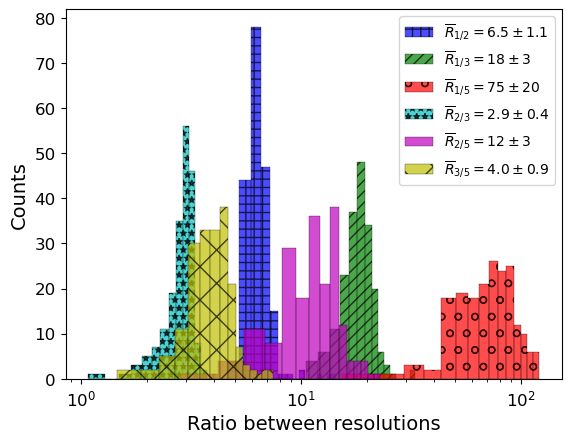

In [12]:
lab = ['1/2', '1/3', '1/5', '2/3', '2/5', '3/5']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
hat = ['++', '///', 'o', '**', '', 'x']
for (i,arr) in enumerate([h2, h3, h5, t23, t25, t35]):
    arr = np.delete(arr, np.where(arr < 1))
    arr = np.delete(arr, np.where(arr > 1000))
    std = np.std(arr)
    if std > 2:
        std = int(np.round(std))
    elif std > 1:
        std = str(np.round(std,1))
    else:
        std = '%.1g'%std
    print(std)
    if type(std) == int:
        mean = str(int(np.round(np.mean(arr))))
    else:
        mean = '{:.{}f}'.format(np.mean(arr), len(str(std).split('.')[-1]))
    plt.hist(arr, bins=15, label="$\overline{R}_{%s} = %s \pm %s$"%(lab[i],mean,std), #bins=15
             color=colors[i], alpha=0.7, linewidth=0.3, edgecolor='k', hatch=hat[i])
    plt.xlabel('Ratio between resolutions', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('Counts', fontsize=14)
    plt.yticks(fontsize=12)
    print('Ratio '+lab[i]+' = ' + str((np.mean(arr), np.std(arr))))
plt.legend();
plt.xscale('log')

In [41]:
from scipy.optimize import curve_fit
def func1(x, a, b, c): #
    return np.power(x,c) * b #+ c * x**2
def func2(x, b): #
    return x * b #+ c * x**2

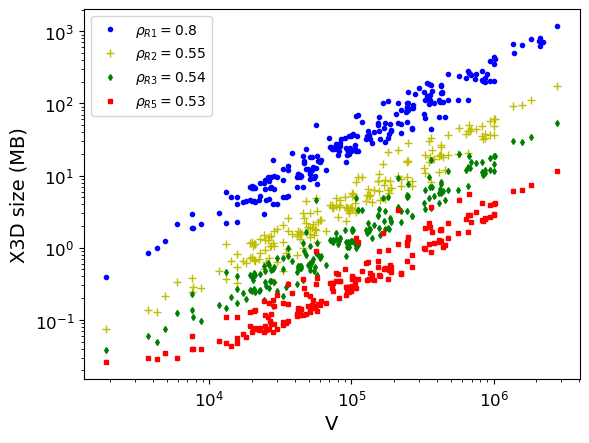

In [13]:
plt.plot(hicont, y_highno, 'b.', label=r'$\rho_{R1} = %s$'%np.round(pearsonr(hicont, y_highno).statistic,2))
plt.plot(hicont, y_tri2, 'y+', label=r'$\rho_{R2} = %s$'%np.round(pearsonr(hicont, y_tri2).statistic,2))
plt.plot(hicont, y_tri3, 'gd', markersize=3, label=r'$\rho_{R3} = %s$'%np.round(pearsonr(hicont, y_tri3).statistic,2))
plt.plot(hicont, y_tri5, 'rs', markersize=3, label=r'$\rho_{R5} = %s$'%np.round(pearsonr(hicont, y_tri5).statistic,2))
#plt.plot(hicont[-len(y_highyes):], y_highyes, 'kx', label='w/ 2D image')
w = 1/np.cos(hicont/np.max(hicont) * np.pi/2)
# w = np.ones(len(hicont))
# popt, pcov = curve_fit(func2, hicont, y_highno, sigma=w)
# plt.plot(np.sort(hicont), func2(np.sort(hicont), *popt), 'b')
# print(popt)
# popt, pcov = curve_fit(func2, hicont, y_tri2, sigma=w)
# plt.plot(np.sort(hicont), func2(np.sort(hicont), *popt), 'y') #(2e-2,3.7e-5)
# print(popt)
# popt, pcov = curve_fit(func2, hicont, y_tri3, sigma=w)
# plt.plot(np.sort(hicont), func2(np.sort(hicont), *popt), 'g')
# print(popt)
# popt, pcov = curve_fit(func2, hicont, y_tri5, sigma=w)
# plt.plot(np.sort(hicont), func2(np.sort(hicont), *popt), 'r')
# print(popt)
plt.xlabel('V', fontsize=14)
plt.ylabel('X3D size (MB)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.legend();

In [14]:
print('Mean = ',np.mean(hicont_p[hicont_p<0.6]),'%, std = ', np.std(hicont_p[hicont_p<0.6]), '%, max = ', np.max(hicont_p[hicont_p<0.6]), '%, min = ', np.min(hicont_p), '%')

Mean =  0.20452088969397395 %, std =  0.10095962498724856 %, max =  0.5870031932043651 %, min =  0.059573782428708 %


In [16]:
all = pd.read_csv('..\stats_CSV\stats_RAM_all_2.csv')

In [17]:
m1 = all['High/No'] > 250
m2 = all['T_RAM'] < 3700
m3 = all['T_RAM'] > 3400
m4 = all['High/No'] < 260

m = m1 * m2 * m3 * m4

print(all['T_RAM'][m])
print(all['Name'][m])
print(all['High/No'][m])

172    3599.378906
Name: T_RAM, dtype: float64
172    HCG62
Name: Name, dtype: object
172    252.186
Name: High/No, dtype: float64


In [18]:
def func1(x, a, b, c): #
    return a + x * b + c * x**2

# w = 1/np.cos(all['High/No']/np.max(all['High/No']) * np.pi/2)
# w = 1/np.arange(1,len(all['High/No'])+1)
w = np.ones(len(all['High/No']))
popt, pcov = curve_fit(func1, all['High/No'], all['T_RAM'], sigma=w)

std = []
par = []
for i in range(len(pcov)):
    if np.sqrt(pcov[i,i]) > 2:
        std.append(int(np.round(np.sqrt(pcov[i,i]))))
    elif np.sqrt(pcov[i,i]) > 1:
        std.append(str(np.round(np.sqrt(pcov[i,i],1))))
    else:
        std.append('%.1g'%np.sqrt(pcov[i,i]))
    print(std[i])
    if type(std[i]) == int:
        par.append(str(int(np.round(popt[i]))))
    else:
        par.append('{:.{}f}'.format(popt[i], len(str(std[i]).split('.')[-1])))

print(f'$y = ({par[0]} \pm {std[0]}) + ({par[1]} \pm {std[1]}) x + ({par[2]} \pm {std[2]}) x^2$')


6
0.1
0.0004
$y = (459 \pm 6) + (13.3 \pm 0.1) x + (-0.0091 \pm 0.0004) x^2$


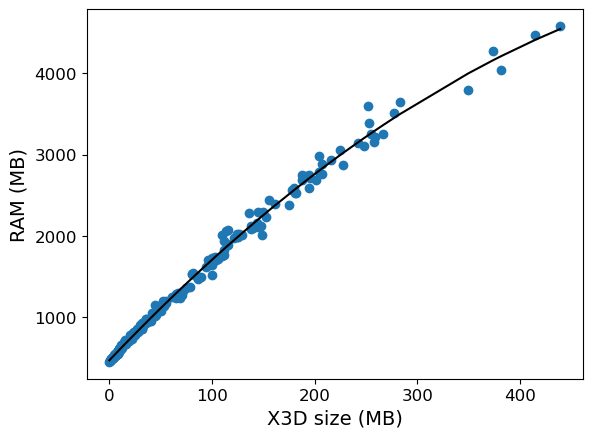

In [19]:
plt.plot(all['High/No'], all['T_RAM'], 'o')
plt.plot(np.sort(all['High/No']), func1(np.sort(all['High/No']), *popt), 'k')
plt.ylabel('RAM (MB)', fontsize=14)
plt.xlabel('X3D size (MB)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);
# plt.yscle('alog')
# plt.xscale('log')
# plt.xlim(250,260)
# plt.ylim(3400,3700)